## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [35]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## 1) Cargar data set

Sabemos que el conjunto de datos gira en torno a las aspiraciones profesionales de la Generación Z y cuenta con aproximadamente 235 filas y 15 campos de información, recopilados en forma de encuesta, principalmente en India y también en algunos otros países.

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp/Módulo 7/Your Career Aspirations of GenZ.csv")
df.head()

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."
3,India,834003,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team
4,India,301019,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,No,Will NOT work for them,5,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...",Teaching in any of the institutes/online or Of...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


**Comenatario:** El dataset fue cargado correctamente y contiene aproximadamente 235 observaciones con 15 variables.

## 2) ANÁLISIS EXPLORATORIO Y LIMPIEZA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     235 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          235 non-null    int64 
 2   Your Gender                                                                                                               235 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             235 non-null    ob

**Comentario:** El dataset presenta 100% de completitud, sin valores nulos. Esto elimina la necesidad de imputación y permite enfocar los esfuerzos en transformación y codificación de variables categóricas.

In [39]:
df.shape

(235, 15)

In [40]:
df.describe(include='all')

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
count,235,235.000000,235,235,235,235,235,235,235.000000,235,235,235,235,235,235
unique,4,NaN,2,5,3,3,2,2,NaN,6,5,6,84,5,20
top,India,NaN,Male,My Parents,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,NaN,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
freq,231,NaN,156,79,110,139,157,158,NaN,60,113,59,12,129,63
mean,NaN,492560.970213,NaN,NaN,NaN,NaN,NaN,NaN,5.272340,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,213622.174893,NaN,NaN,NaN,NaN,NaN,NaN,2.479463,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1234.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,381012.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,524412.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,607253.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df["Your Current Country."].value_counts()

,count
Your Current Country.,
India,231
Germany,2
United Arab Emirates,1
United States of America,1


In [42]:
df["Your Current Zip Code / Pin Code"].value_counts()

,count
Your Current Zip Code / Pin Code,
605110,8
425001,8
852201,3
561203,3
301019,3
...,...
605107,1
605001,1
442406,1


**Comentario:** La variable “Your Current Country” presenta una distribución altamente desbalanceada, donde más del 98% de los registros corresponden a India. Debido a esta falta de variabilidad, la variable no aporta información predictiva relevante, por lo que será eliminada. Y la variable “Your Current Zip Code / Pin Code” presenta una cardinalidad extremadamente alta, con la mayoría de los valores apareciendo una sola vez.
Dado que no aporta información semántica relevante al problema de predicción y podría inducir sobreajuste, la variable será eliminada.

In [43]:
df = df.drop(columns=["Your Current Country.","Your Current Zip Code / Pin Code"])

**Comentario:** Se eliminó la variable “Your Current Country” debido a su alta dominancia de una sola categoría (>98% India), lo que reduce su capacidad explicativa. Asimismo, se eliminó “Zip Code” por no aportar valor predictivo y presentar alta cardinalidad.

**Comentario:** Se agruparán las 6 categorías originales de modalidad laboral en tres clases (Remote / Hybrid / Onsite) para mejorar la separabilidad y facilitar el entrenamiento de modelos de clasificación multiclase.

In [44]:
df["What is the most preferred working environment for you."].value_counts()

,count
What is the most preferred working environment for you.,
Fully Remote with Options to travel as and when needed,60
Hybrid Working Environment with less than 15 days a month at office,57
Every Day Office Environment,50
Hybrid Working Environment with less than 10 days a month at office,31
Hybrid Working Environment with less than 3 days a month at office,26
Fully Remote with No option to visit offices,11


**Comentario:** La variable objetivo original contiene seis categorías altamente similares entre sí, lo que introduce ruido semántico y fragmentación de clases. Para mejorar la capacidad predictiva del modelo, se realizará una recodificación agrupando las respuestas en tres categorías conceptualmente claras: Remote, Hybrid y Onsite. Esta transformación reduce la varianza del modelo, mejora el balance entre clases y facilita la interpretación de los resultados, sin pérdida significativa de información.

In [45]:
def map_work_env(x):
    x = x.lower()
    if "remote" in x:
        return "Remote"
    elif "hybrid" in x:
        return "Hybrid"
    else:
        return "Onsite"

In [46]:
df["working_environment"] = df["What is the most preferred working environment for you."].apply(map_work_env)
df = df.drop(columns=["What is the most preferred working environment for you."])

In [47]:
df["working_environment"].value_counts()

,count
working_environment,
Hybrid,114
Remote,71
Onsite,50


**Comentario:** La Generación Z representada en el dataset muestra una preferencia mayoritaria por esquemas de trabajo híbridos, seguida por modalidades de trabajo remoto, mientras que el trabajo presencial completo aparece como la opción menos preferida.

La variable objetivo presenta una distribución relativamente equilibrada entre las tres clases (Remote, Hybrid y Onsite), lo que permite entrenar modelos de clasificación multiclase sin necesidad de aplicar técnicas adicionales de balanceo de clases. Esta característica contribuye a una mayor estabilidad del modelo y a una mejor capacidad de generalización.

Escalamiento: No se aplicó escalamiento porque la mayoría de variables son categóricas y se codificarán con One-Hot Encoding. La única variable numérica del dataset corresponde a una escala ordinal acotada entre 1 y 10, sin valores extremos. Considerando el tipo de modelos utilizados y el rango reducido de la variable, no se aplicó escalamiento, ya que no resulta necesario para esta problemática

Tokenización: No se aplicó tokenización porque el dataset no contiene texto libre; las variables son respuestas cerradas tipo encuesta.

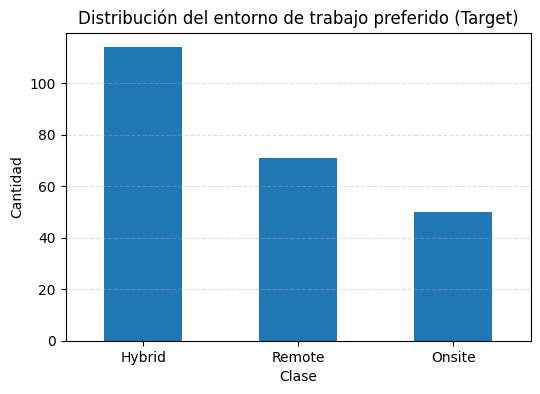

In [48]:
plt.figure(figsize=(6,4))
df["working_environment"].value_counts().plot(kind="bar")
plt.title("Distribución del entorno de trabajo preferido (Target)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

<Figure size 700x400 with 0 Axes>

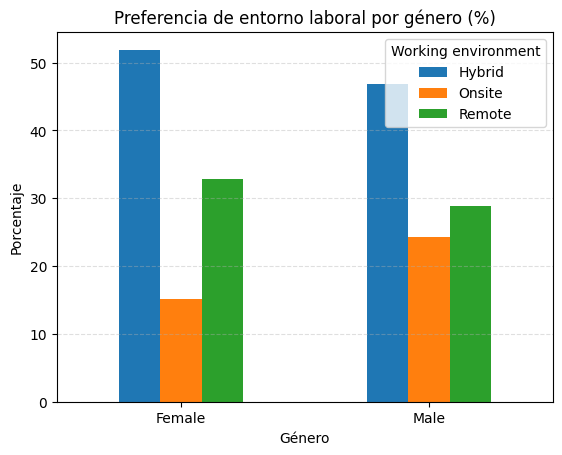

In [49]:
ct = pd.crosstab(df["Your Gender"], df["working_environment"], normalize="index") * 100

plt.figure(figsize=(7,4))
ct.plot(kind="bar")
plt.title("Preferencia de entorno laboral por género (%)")
plt.xlabel("Género")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0)
plt.legend(title="Working environment")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


**Comentario**: El EDA confirmó un dataset completo (sin nulos), con predominio de variables categóricas. Se eliminaron variables no informativas (Country y Zip) y se definió una variable objetivo clara recodificada a tres clases (Remote/Hybrid/Onsite) con distribución relativamente equilibrada. Dado el tipo de datos, no aplica tokenización y el escalamiento no es necesario en esta problemática.

## 3) Preprocesamiento

In [50]:
# 1) Separar X e y
X = df.drop(columns=["working_environment"])
y = df["working_environment"]
print("Distribución del target:\n", y.value_counts(), "\n")

# 2) Train/Test split (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

print("Tamaño train:", X_train.shape, " | Tamaño test:", X_test.shape)

# 3) Preprocesamiento (One-Hot Encoding)
#Aplicamos OneHot SOLO a columnas categóricas
#La columna numérica (1-10) se deja tal cual (no se escala)
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("\nColumnas numéricas:", num_cols)
print("Columnas categóricas:", len(cat_cols))

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)


Distribución del target:
 working_environment
Hybrid    114
Remote     71
Onsite     50
Name: count, dtype: int64 

Tamaño train: (188, 12)  | Tamaño test: (47, 12)

Columnas numéricas: ['How likely would you work for a company whose mission is not bringing social impact ?']
Columnas categóricas: 11


**Comentario:** Dado que la mayoría de las variables son categóricas, se aplicó codificación mediante One-Hot Encoding, permitiendo transformar las variables en formato numérico compatible con algoritmos de machine learning.

## 4) Entrenamiento

In [51]:
# Modelos
# Baseline: Logistic Regression multinomial
pipe_lr = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=2000, multi_class="multinomial", n_jobs=-1, random_state=42))
])

# Modelo robusto: Random Forest
pipe_rf = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

#Entrenamiento
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

print("\n✅ Modelos entrenados: Logistic Regression (baseline) y Random Forest (robusto)")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



✅ Modelos entrenados: Logistic Regression (baseline) y Random Forest (robusto)


**Comentario:** Se entrenaron dos modelos de clasificación multiclase: una Regresión Logística multinomial como modelo base y un Random Forest como modelo robusto, utilizando un conjunto de datos previamente limpiado. El dataset fue dividido en conjuntos de entrenamiento y prueba en una proporción 80/20, aplicando una separación estratificada para preservar la distribución de la variable objetivo. Ambos modelos fueron entrenados mediante un Pipeline que incorpora One-Hot Encoding para las variables categóricas y mantiene la variable numérica ordinal sin escalamiento.

##5) Predicciones

In [52]:
# Predicciones de prueba (requisito de Actividad 2)

def predict_with_confidence(model, X_sample: pd.DataFrame, top_k: int = 3):
    preds = model.predict(X_sample)
    probas = model.predict_proba(X_sample)
    conf = probas.max(axis=1)
    classes = model.classes_

    top = []
    for i in range(len(X_sample)):
        idx = np.argsort(probas[i])[::-1][:top_k]
        top.append([(classes[j], float(probas[i][j])) for j in idx])

    return preds, conf, top

# Tomamos 3 filas de test como ejemplos reales
X_sample = X_test.sample(3, random_state=42)

pred_lr, conf_lr, top_lr = predict_with_confidence(pipe_lr, X_sample)
pred_rf, conf_rf, top_rf = predict_with_confidence(pipe_rf, X_sample)

print("\n--- Predicciones de prueba (Logistic Regression) ---")
for i in range(len(X_sample)):
    print(f"Ejemplo #{i+1}: pred={pred_lr[i]} | confianza={conf_lr[i]:.3f} | top={[(c, round(p,3)) for c,p in top_lr[i]]}")

print("\n--- Predicciones de prueba (Random Forest) ---")
for i in range(len(X_sample)):
    print(f"Ejemplo #{i+1}: pred={pred_rf[i]} | confianza={conf_rf[i]:.3f} | top={[(c, round(p,3)) for c,p in top_rf[i]]}")



--- Predicciones de prueba (Logistic Regression) ---
Ejemplo #1: pred=Hybrid | confianza=0.831 | top=[('Hybrid', 0.831), ('Remote', 0.109), ('Onsite', 0.06)]
Ejemplo #2: pred=Remote | confianza=0.753 | top=[('Remote', 0.753), ('Hybrid', 0.188), ('Onsite', 0.059)]
Ejemplo #3: pred=Hybrid | confianza=0.555 | top=[('Hybrid', 0.555), ('Remote', 0.389), ('Onsite', 0.056)]

--- Predicciones de prueba (Random Forest) ---
Ejemplo #1: pred=Hybrid | confianza=0.770 | top=[('Hybrid', 0.77), ('Remote', 0.18), ('Onsite', 0.05)]
Ejemplo #2: pred=Remote | confianza=0.473 | top=[('Remote', 0.473), ('Hybrid', 0.467), ('Onsite', 0.06)]
Ejemplo #3: pred=Remote | confianza=0.587 | top=[('Remote', 0.587), ('Hybrid', 0.36), ('Onsite', 0.053)]


**Comentario:** Se realizaron predicciones de prueba sobre muestras del conjunto de test, obteniendo resultados coherentes y probabilidades asociadas que permiten evaluar el nivel de confianza del modelo. Estos resultados confirman que los modelos son capaces de generalizar y entregar predicciones consistentes con el contexto del problema.

## 6) Evaluación


==== Logistic Regression ====
Accuracy: 0.3830
F1-macro:  0.3591

Classification report:
              precision    recall  f1-score   support

      Hybrid       0.46      0.48      0.47        23
      Onsite       0.38      0.30      0.33        10
      Remote       0.27      0.29      0.28        14

    accuracy                           0.38        47
   macro avg       0.37      0.35      0.36        47
weighted avg       0.38      0.38      0.38        47



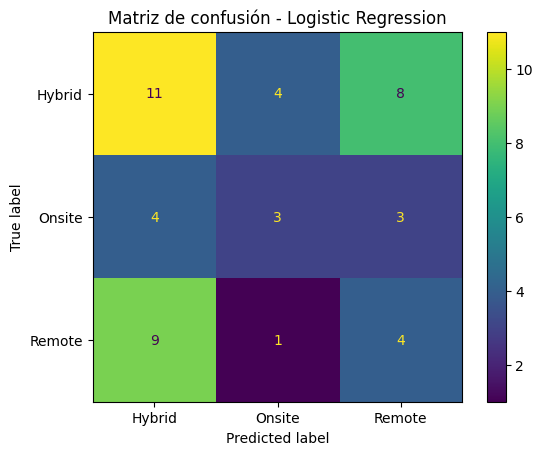


==== Random Forest ====
Accuracy: 0.5106
F1-macro:  0.4597

Classification report:
              precision    recall  f1-score   support

      Hybrid       0.53      0.74      0.62        23
      Onsite       0.67      0.40      0.50        10
      Remote       0.33      0.21      0.26        14

    accuracy                           0.51        47
   macro avg       0.51      0.45      0.46        47
weighted avg       0.50      0.51      0.49        47



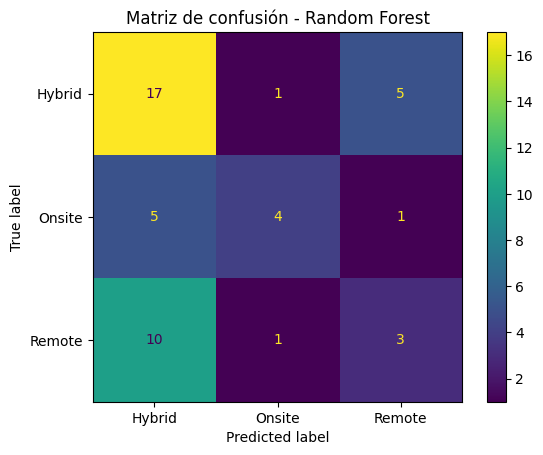

,model,accuracy,f1_macro
1,Random Forest,0.510638,0.459684
0,Logistic Regression,0.382979,0.359094


In [53]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")

    print(f"\n==== {name} ====")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-macro:  {f1m:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format="d")
    plt.title(f"Matriz de confusión - {name}")
    plt.grid(False)
    plt.show()

    return {"model": name, "accuracy": acc, "f1_macro": f1m}

results = []
results.append(evaluate_model("Logistic Regression", pipe_lr, X_test, y_test))
results.append(evaluate_model("Random Forest", pipe_rf, X_test, y_test))

results_df = pd.DataFrame(results).sort_values(by="f1_macro", ascending=False)
results_df

**Comentario:** La comparación entre los modelos muestra que Random Forest supera claramente a la Regresión Logística, alcanzando una accuracy de 0.51 y un F1-macro de 0.46, frente a 0.38 y 0.36 respectivamente.

Esto sugiere que la relación entre las variables explicativas y la modalidad laboral no es lineal, por lo que modelos basados en árboles capturan mejor las interacciones entre variables categóricas y patrones complejos del dataset.

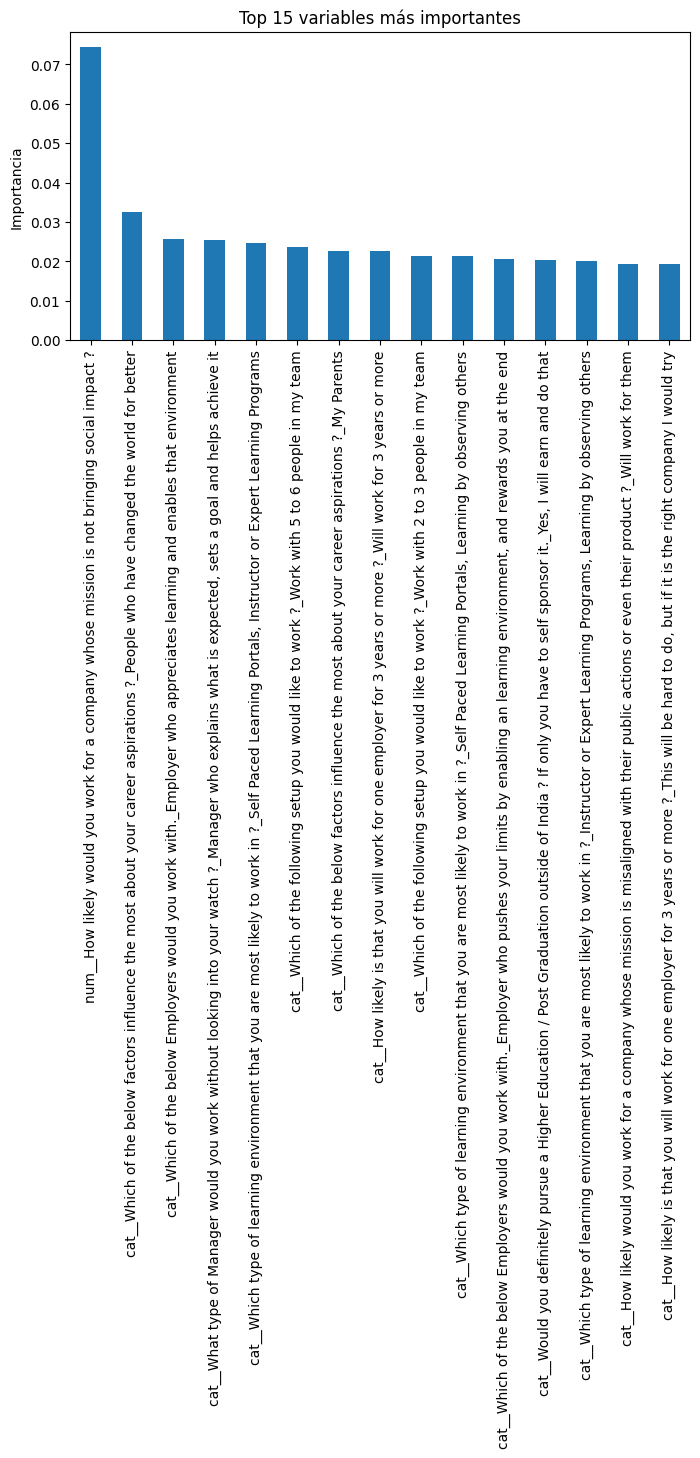

In [61]:
importances = best_rf.named_steps["model"].feature_importances_

feat_names = best_rf.named_steps["preprocess"].get_feature_names_out()

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(15)

plt.figure(figsize=(8,4))
feat_imp.plot(kind="bar")
plt.title("Top 15 variables más importantes")
plt.ylabel("Importancia")
plt.show()

**Comentario:** Se evaluó el modelo utilizando múltiples métricas (accuracy, precision, recall y F1-score), complementadas con visualizaciones como la matriz de confusión y la importancia de variables, lo que permite una interpretación integral del rendimiento del modelo.

## 7) Mejoramiento de modelo random forest (tuning)

---



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Mejor CV F1-macro: 0.4490240449925018

==== Random Forest (tuned) ====
Accuracy: 0.5319
F1-macro:  0.4719

Classification report:
              precision    recall  f1-score   support

      Hybrid       0.55      0.78      0.64        23
      Onsite       0.67      0.40      0.50        10
      Remote       0.38      0.21      0.27        14

    accuracy                           0.53        47
   macro avg       0.53      0.47      0.47        47
weighted avg       0.52      0.53      0.50        47



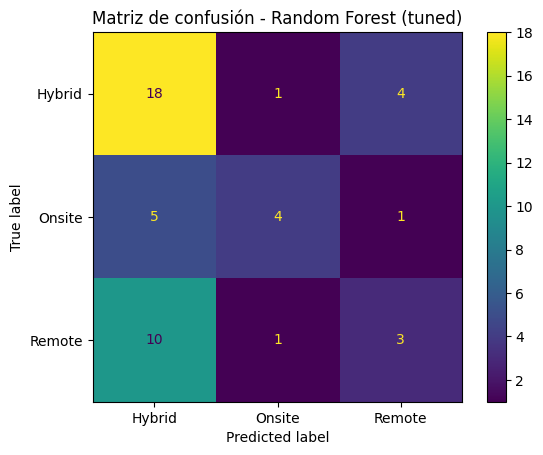

In [54]:
param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 10],
    "model__min_samples_leaf": [1, 2],
 }

pipe_rf_base = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

gs = GridSearchCV(
    pipe_rf_base,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)

print("Mejores params:", gs.best_params_)
print("Mejor CV F1-macro:", gs.best_score_)

best_rf = gs.best_estimator_
_ = evaluate_model("Random Forest (tuned)", best_rf, X_test, y_test)

**Comentario:** El modelo Random Forest fue optimizado, alcanzando un F1-macro de 0.47 y un accuracy de 0.53, superando de manera consistente al modelo base de Regresión Logística.  

Finalmente, el modelo seleccionado es Random Forest, que es un método de ensamble basado en múltiples árboles de decisión, lo que permite mejorar la precisión y reducir la varianza.

## 8) Implementación de API

In [55]:
import joblib
joblib.dump(best_rf, "modelo_udds_m7.joblib")

['modelo_udds_m7.joblib']

In [56]:
!pip -q install fastapi uvicorn pyngrok joblib pandas

In [57]:
%%writefile app.py
from fastapi import FastAPI
from pydantic import BaseModel, Field
from typing import Dict, Any, List

app = FastAPI(title="UDD M7 Predictor", version="1.0")

model = joblib.load("modelo_udds_m7.joblib")

class PredictRequest(BaseModel):
    record: Dict[str, Any] = Field(..., description="Un registro con las columnas del modelo")

class PredictBatchRequest(BaseModel):
    records: List[Dict[str, Any]] = Field(..., description="Lista de registros")

@app.get("/")
def root():
    return {"status": "ok", "message": "UDD M7 Predictor API"}

@app.post("/predict")
def predict(req: PredictRequest):
    df = pd.DataFrame([req.record])
    pred = model.predict(df)[0]
    proba = None
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(df)[0]
        classes = list(model.classes_)
        proba = {str(c): round(float(p), 4) for c, p in zip(classes, probs)}
    return {"prediction": str(pred), "probabilities": proba}

@app.post("/predict_batch")
def predict_batch(req: PredictBatchRequest):
    df = pd.DataFrame(req.records)
    preds = model.predict(df)
    response = {"predictions": [str(p) for p in preds]}
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(df)
        classes = list(model.classes_)
        response["probabilities"] = [
            {str(c): round(float(p), 4) for c, p in zip(classes, row)} for row in probs
        ]
    return response

Overwriting app.py


**Comentario:** Se implementó una API REST utilizando FastAPI que permite consumir el modelo de machine learning entrenado.La API expone endpoints para predicción individual y por lotes, recibiendo datos en formato JSON, transformándolos internamente y devolviendo la clase predicha junto con sus probabilidades. Esto permite que el modelo sea consumido por aplicaciones externas en tiempo real.

In [58]:
%%writefile requirements.txt
fastapi
uvicorn
pandas
joblib
scikit-learn

Overwriting requirements.txt


In [59]:
from google.colab import files

files.download("app.py")
files.download("requirements.txt")
files.download("modelo_udds_m7.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
import sklearn, pandas, joblib, sys
print("python:", sys.version)
print("sklearn:", sklearn.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)

python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
sklearn: 1.6.1
pandas: 2.2.2
joblib: 1.5.3


**Comentario:** El modelo se expuso mediante una API REST desplegada en Render. La API recibe datos vía POST y devuelve la clase predicha (p. ej. Hybrid) junto con probabilidades asociadas, permitiendo interpretar el nivel de confianza del modelo.